In [1]:
#The goal here is to use machine learning to help a bank sort applications into approved loans or rejected loans. 
# Let's start by importing the dataset and tools.

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os
print("Import Complete")

Import Complete


In [3]:
api = KaggleApi()
api.authenticate()
print("Athentification Complete")

Athentification Complete


In [4]:
dataset = 'ninzaami/loan-predication'
save_path = r'D:\Doud_Files\IT CAREER\Data\Loan_Prediction_ML\Loan_Prediction_ML'
os.makedirs(save_path, exist_ok=True)
print("Dataset Ok")

Dataset Ok


In [5]:
api.dataset_download_files(dataset, path=save_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ninzaami/loan-predication


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
print("Import Complete")

Import Complete


In [7]:
# Let's load the dataset into Pandas.

In [8]:
path = r'D:\Doud_Files\IT CAREER\Data\Loan_Prediction_ML\Loan_Prediction_ML\Loan_data.csv'
df = pd.read_csv(path)

In [9]:
# Time for data exploration.

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.shape

(614, 13)

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# We can see that most coluns have missing values. 
# N/A in columns like "Married" could be dropped as they are not as important in a loan application as "Credit_History" or "Loan_Amount".
# First step should be to read the data documentation to check if there are requirments or warnings. 
# If there isn't, second step should be to check with data owner or person of authority on this matter. 
# In this case, let's evaluate if we are dealing with MCAR, MAR or MNAR.

In [16]:
# First step: initial visualization using missingno.

In [17]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import missingno as msno
import matplotlib.pyplot as plt

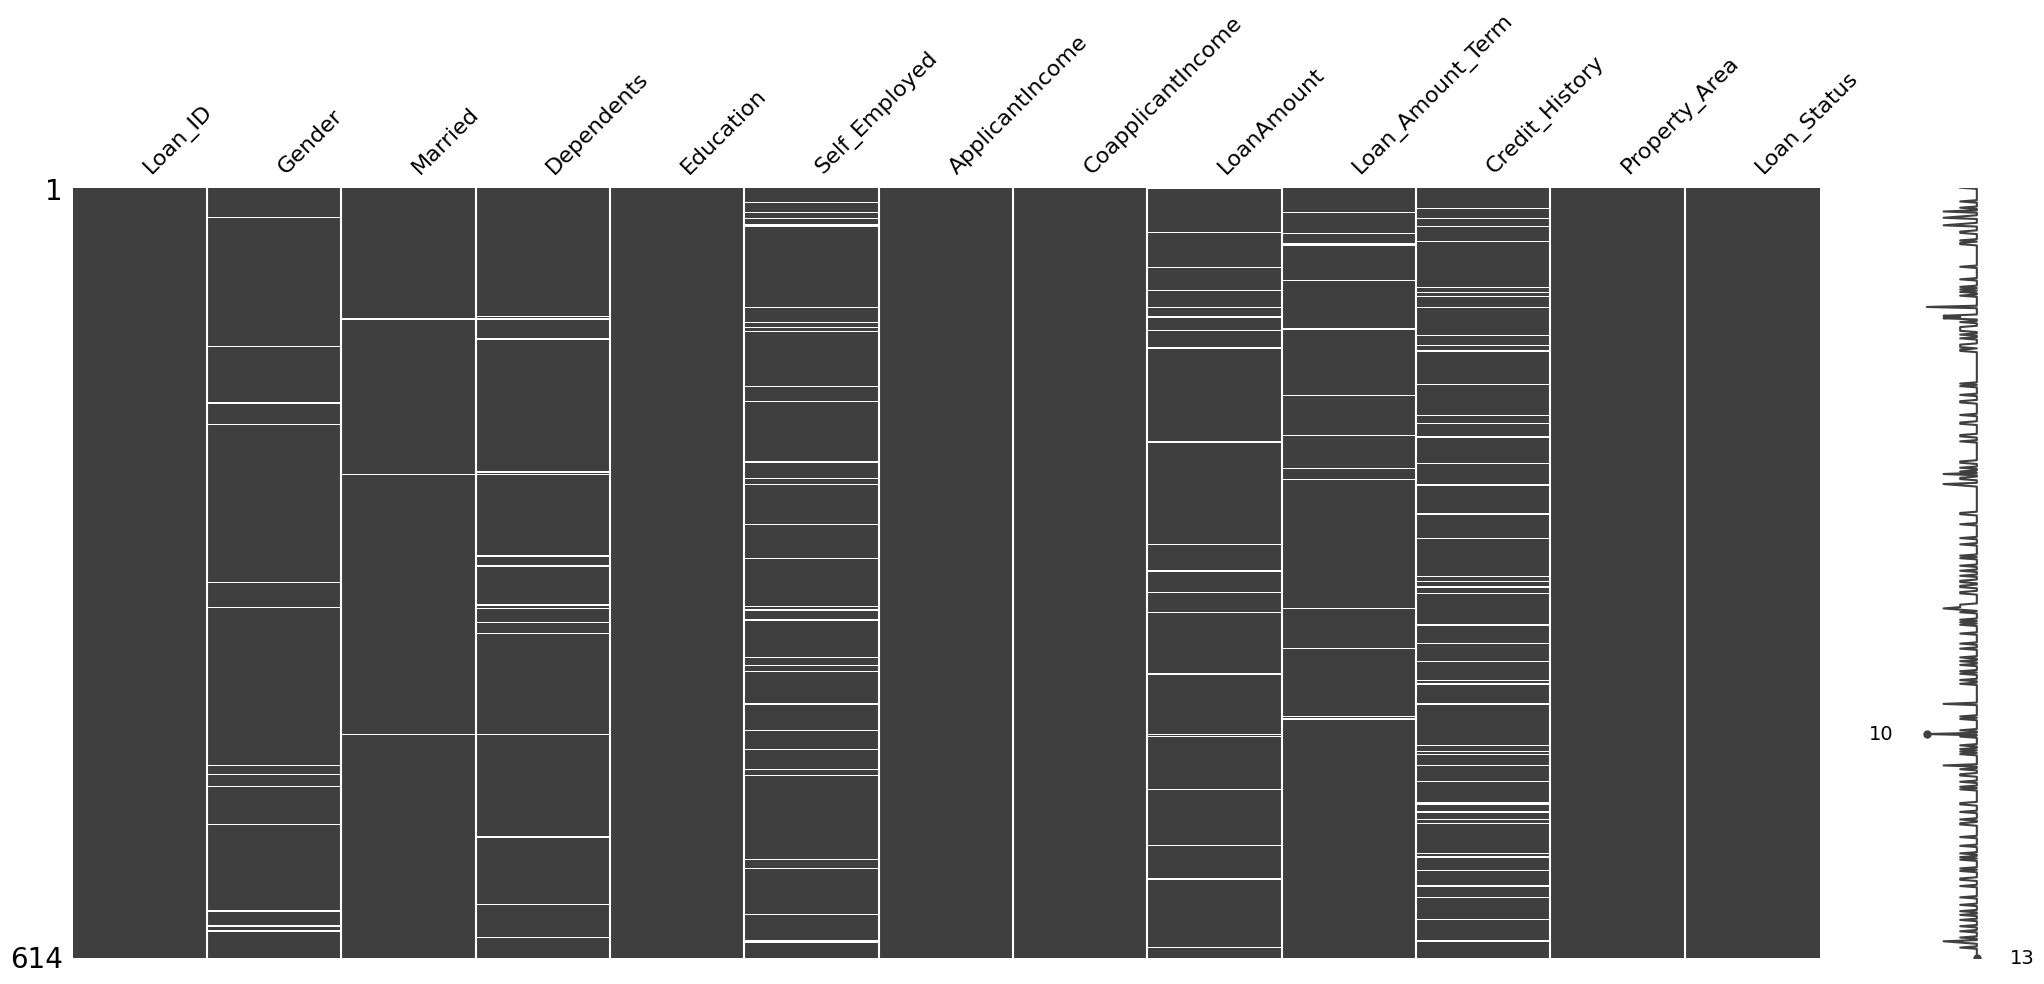

In [19]:
msno.matrix(df)
plt.show()

In [20]:
# From what I see above, there doesn't seem to be any big correltaion between data, except for the "Married" and "Dependants" column.
# Let's proceed with a correlation analysis using heatmap.

Text(0.5, 1.0, 'Correlation of missing data')

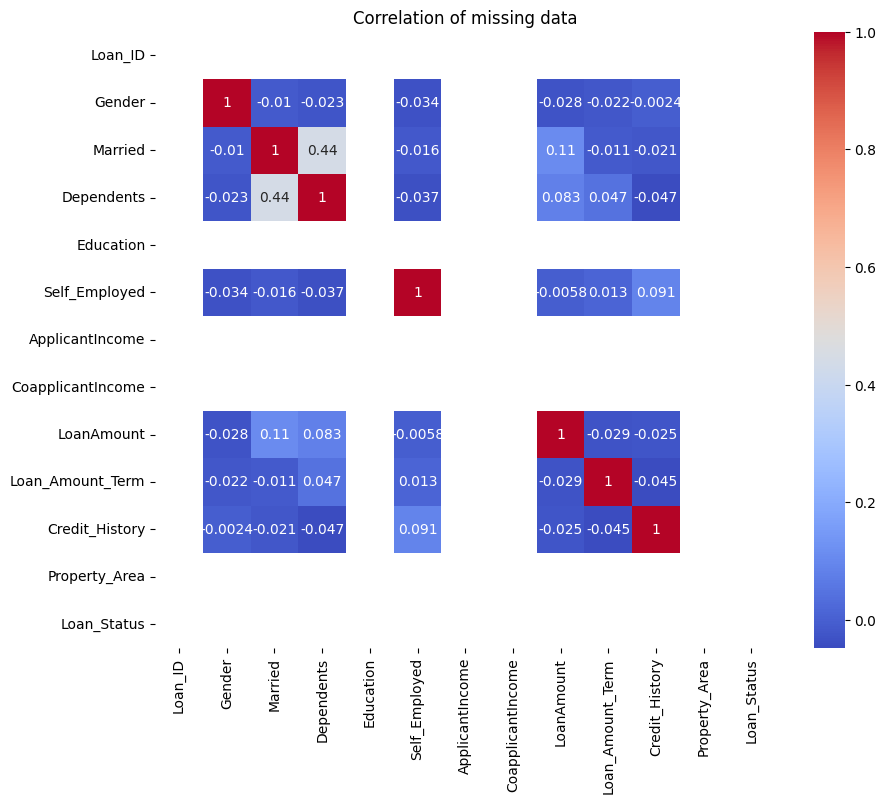

In [21]:
missing_corr = df.isnull().corr()
plt.figure(figsize = (10,8))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of missing data")

In [22]:
# We can confirm that missing data seemes to be mostly MCAR except for previously noted "Married" and "Dependents" columns that looks like MAR.
# As those columns aren't critical for loan approval rates, and global missing values won't create a bias in the model, we will drop them. 

In [23]:
df = df.dropna()

In [24]:
# Let's check to see if we are good.

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [27]:
# Now we need to encode the labels for ease of process.

In [47]:
pd.set_option('future.no_silent_downcasting', True)
df = df.replace({"Gender": {'Male': 0, 'Female': 1},
                 "Loan_Status": {'N': 0, 'Y': 1},
                 "Dependents": {'3+': 4},
                 "Self_Employed": {'No': 0, 'Yes': 1},
                 "Married": {'No':0,'Yes':1},
                 "Education": {'Not Graduate':0,'Graduate':1},
                 "Property_Area": {'Rural':0, 'Semiurban': 1, 'Urban':2} })


In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [57]:
# Now we are ready for the Train-Test Split method to evaluate our model performance. 
# We will separate our data into a training set and a testing set.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [60]:
# Check the values.

In [61]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [62]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: object

In [65]:
# We will keep 20% of out data as testing values.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [66]:
# I chose Random Forest as my model for its accuracy and versatility.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier(random_state=33)
model.fit(X_train, y_train)


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [73]:
# Ah.

In [74]:
print(y_train.unique())
print(y_train.dtype)

[1 0]
object


In [76]:
# Let's rectify that ! 

In [87]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [88]:
#Tadaa ! I believe in keeping my mistakes as documentation as resolution skills are sometimes more important than result.

In [89]:
model = RandomForestClassifier(random_state=33)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

In [90]:
# Let's evaluate our model on the test set.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
y_pred = model.predict(X_test)

In [95]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7604166666666666
Precision: 0.7733333333333333
Recall: 0.90625
F1 Score: 0.8345323741007195


In [99]:
# The results are overall good. 
# However, it all depends wether our business favours recall (catching most eligible loans), or precision (minimizing false positives). 
# In our case, out model os strong at recall but can be improved at precision.
# Let's fine-tune it. 

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

In [102]:
grid_search = GridSearchCV(model, param_grid, cv=5)

In [103]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=33),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [104]:
best_model = grid_search.best_estimator_

In [105]:
# Now that we have our best model, let's run another batch of prediction.

In [106]:
y_pred_best = best_model.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Best Accuracy: {accuracy}")
print(f"Best Precision: {precision}")
print(f"Best Recall: {recall}")
print(f"Best F1 Score: {f1}")

Best Accuracy: 0.75
Best Precision: 0.7564102564102564
Best Recall: 0.921875
Best F1 Score: 0.8309859154929577


In [108]:
# We can see a nice improve on our recall score which is positive ! 
# However, the following steps will once again depend on our business directive and preferences. Do they prefere a high 
# good loan approval rate with risks of approving bad loans? Or a low bad loan approval rate with the risk of rejecting good loans?
# Depending on decisions, we could fine-tune it using threshold adjustment or try a different model like Logistic regression.
# I will stop here for now though !

In [111]:
# For posterity, let's check feature importance. 

In [114]:
importances = best_model.feature_importances_
features_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': features_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = False)
print(feature_importance_df)

              Feature  Importance
9      Credit_History    0.303633
5     ApplicantIncome    0.176830
7          LoanAmount    0.167157
6   CoapplicantIncome    0.111003
8    Loan_Amount_Term    0.061353
2          Dependents    0.049238
1             Married    0.034028
10      Property_Area    0.033327
3           Education    0.025910
0              Gender    0.022403
4       Self_Employed    0.015119


In [115]:
# Here we can see how important our credit history, our income and co income as well as the loan amount are in an application's approval.

In [ ]:
# And here we go ! The next natural step would be to save our model, expose it through a web API and deploy it ! :)